# What is t-test?

* A hypothesis test/ mathematical tool that summarizes evidence about a hypothesis.


# How?


* By comparing the parameters of point estimates to the values predicted.
* It give us estimates about whether the variation of mean between 2 groups are due to random chance or due to  the product of specific characteristics within the groups

# Assumptions Of t-test

* 1. Dependent variable or Y should be measured on a continuous scale.

* 2.  Independent Variable or X consist of 2 categorical, independent groups

* 3. You should have independence of Observations

* 4. There should be no outliers

* 5. Your dependent Variable must be approximately normally distributed for each group of independent variables.

* 6. There needs to be homogeneity of variances

Useful Link: https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

# Student aclcohol Dataset analysis

In [6]:
#install.packages("car", dependencies = TRUE)

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'zip', 'estimability', 'insight', 'miniUI', 'webshot', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'RcppEigen', 'effects', 'bdsmatrix', 'crosstalk', 'manipulateWidget', 'mitools', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'alr4', 'coxme', 'leaps', 'lmtest', 'MatrixModels', 'rgl', 'sandwich', 'SparseM', 'survey'




  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
RcppArmadillo 0.10.4.0.0 0.10.5.0.0              TRUE
zip                2.1.1      2.2.0              TRUE
insight           0.14.0     0.14.1             FALSE
lme4              1.1-26     1.1-27              TRUE
sandwich           3.0-0      3.0-1             FALSE

  Binaries will be installed
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\NITHIN\anaconda3\envs\RStudio\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\NITHIN\anaconda3\envs\RStudio\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'estimability' successfully unpacked and MD5 sums checked
package 'miniUI' successfully unpacked and MD5 sums checked
package 'webshot' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'effects' successfully unpacked and MD5 sums checked
package 'bdsmatrix' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'manipulateWidget' successfully unpacked and MD5 sums checked
packag

installing the source packages 'insight', 'sandwich'



In [7]:
# Load relevant libraries
library(tidyverse)
library(ggplot2)
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some



In [9]:
# Save data in data frames
math  <- read.csv("C:/Users/NITHIN/Desktop/github/T-test In R/student-mat.csv")
math <- data.frame(math)

In [10]:
# Have a look at the dataset.
glimpse(math)

Observations: 395
Variables: 33
$ school     <fct> GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, ...
$ sex        <fct> F, F, F, F, F, M, M, F, M, M, F, F, M, M, M, F, F, F, M,...
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, ...
$ address    <fct> U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U,...
$ famsize    <fct> GT3, GT3, LE3, GT3, GT3, LE3, LE3, GT3, LE3, GT3, GT3, G...
$ Pstatus    <fct> A, T, T, T, T, T, T, A, A, T, T, T, T, T, A, T, T, T, T,...
$ Medu       <int> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3,...
$ Fedu       <int> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2,...
$ Mjob       <fct> at_home, at_home, at_home, health, other, services, othe...
$ Fjob       <fct> teacher, other, other, services, other, other, other, te...
$ reason     <fct> course, course, other, home, home, reputation, home, hom...
$ guardian   <fct> mother, father, mother, mother, father, mother, mother, ...
$ traveltime <int> 2

In [12]:
head(math)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


* we have 395 observations and 33 variables.



In [13]:
# Make dataset that consists only of math data, with variables sex and final grade.
math_2 = subset(math, select = c(sex,G3))
glimpse(math_2)


Observations: 395
Variables: 2
$ sex <fct> F, F, F, F, F, M, M, F, M, M, F, F, M, M, M, F, F, F, M, M, M, ...
$ G3  <int> 6, 6, 10, 15, 10, 15, 11, 6, 19, 15, 9, 12, 14, 11, 16, 14, 14,...


##### Question: Is there a statistically significant difference between how well boys and girls do on their final scores?

* H0 : There is no difference between final grades of 2 groups(girls and Boys)

* Ha : There is differnce Between Final Grades of 2 groups

Our dependent variable will be final grade, measured from 0-20, and our independent variable for the t-test will be sex.

###### Assumption # 1: Your dependent variable should be measured on a continuous scale.

Our dependent variable is final score on a scale from 0-20. This is a continous variable, as it takes on many different values, all with equal metrics between them.

###### Assumption # 2: Your independent variable should consist of two categorical, independent groups.

Our independent variable is sex, which (for our purposes at least) is a binary, categorical variable - that is, each observation takes on either male or female in value.

###### Assumption # 3: You should have independence of observations.

Our observations in the 2 groups are independent. that means they donot represent the same individuals having been surveyed at different times. Thus, the groups are independent.If there was dependence we might have approached the problem differently.

Assumptions 1,2,3 donot require any visualization or data analysis. They are simply determined the variables and observations in the question.

##### Assumption # 4 There should be no significant outliers.

To determine whether there are any outliers of significant importance, we will make a visualization of the data. As a categorical variable (eg:sex) cannot have any outliers, we only really need to check the quantitative one, which is final score(G3). So now we'll plot this variable in a few different ways. I have added sex in the bar plot simply to show that the size of both groups are roughly the same.

In [15]:
# In order for us to plot the sex variable in a barplot, we need to save the table information

# in a separate vector, which I here call sex_graph. 

sex_graph <- table(math_2$sex)
sex_graph


  F   M 
208 187 

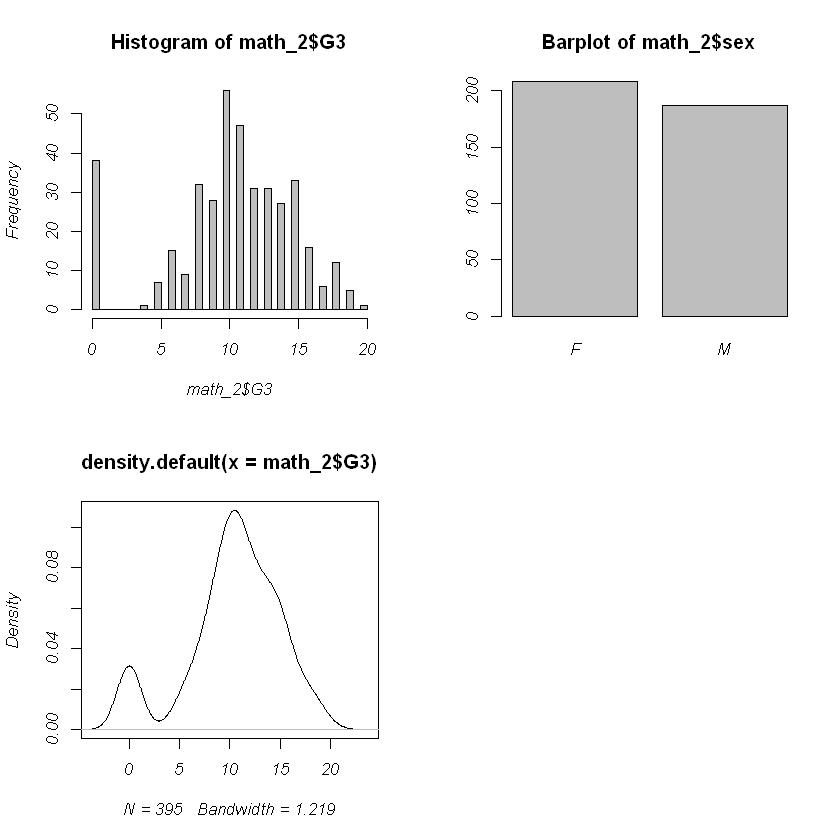

In [18]:
# Histograms/barplot of the different variables that will be relevant to the statistical tests.

par(mfrow=c(2,2))

hist(math_2$G3,breaks = 30, col="grey")
barplot(sex_graph,col='grey',main = "Barplot of math_2$sex")

# Density plots for age, absences and final score
G3_dens  <- density(math_2$G3)
plot(G3_dens)

There is only a few more females than males, and the final score on math is approximately evenly distributed.

However, Large number of individuals have failed tests, that is, received a grade of 0, will pull any analysis of the means of the final score significantly to the left.



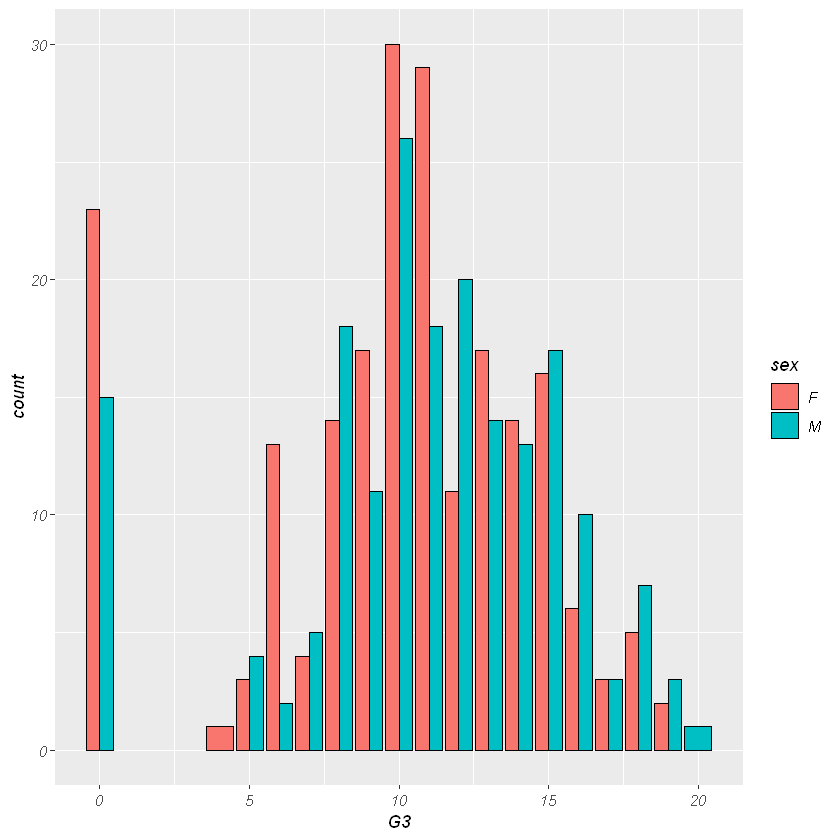

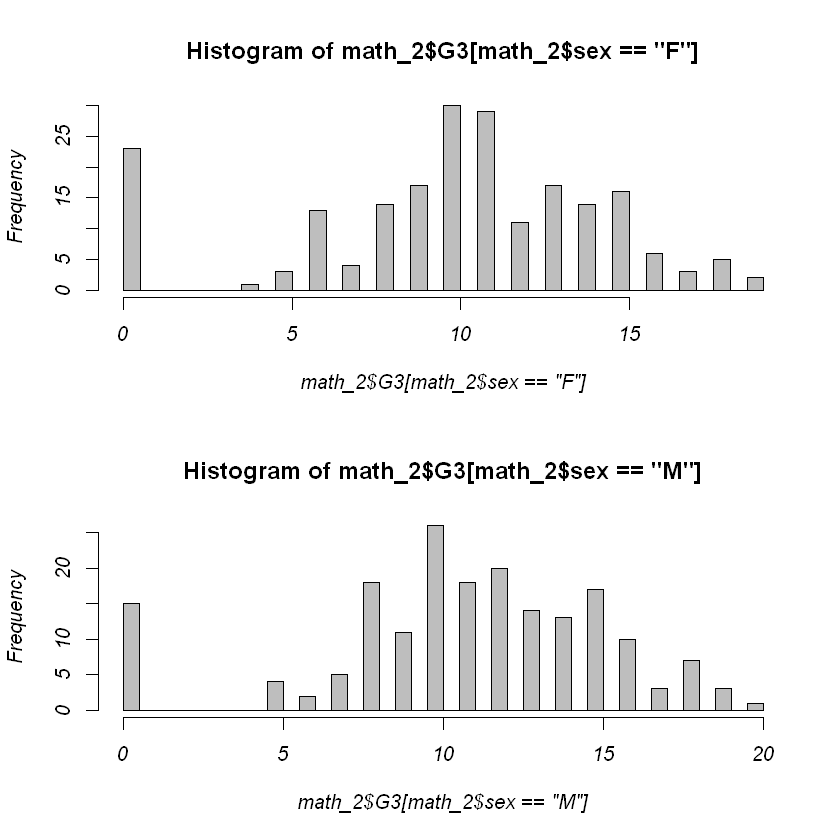

In [24]:
# Make a ggplot that portrays both girls and boys in the same plot

ggplot(data=math_2,aes(x=G3,fill=sex)) +
 geom_bar(stat='count',position='dodge',color='black')

# Make two plots that show each sex in separate plots.
par(mfrow=c(2,1))
hist(math_2$G3[math_2$sex=='F'],breaks=30,col="grey")
hist(math_2$G3[math_2$sex=="M"],breaks=30,col="grey")


so it's hard to get a good idea of the differences between boys and girls based on visualization. They look rather evenly distributed between 2 groups.

In [26]:
# The mean distribution of both groups, including pupils that got a 0 on the final score 

mean(math_2$G3[math_2$sex=='F'])
mean(math_2$G3[math_2$sex=='M'])

[1] 9.966346

[1] 10.91444

In [27]:
# The mean of both groups, excluding pupils that got 0 on the final score 
mean(math_2$G3[math_2$sex=='F' & math_2$G3>0])
mean(math_2$G3[math_2$sex=='M' & math_2$G3>0])

[1] 11.20541

[1] 11.86628

* The average grade obviously increases for both groups when we remove the pupils that failed the course.

* The difference also shrinks from about 0.95 to about 0.66. 

* we want to evaluate whether the difference is statistically significant uisng t-test.

###### Assumption #4 : There should be no significant outliers.

We therefore exclude the pupil that received grade 0. The weight of the outlier group distorts the evenly distributed grades in both groups and pulls the average downwards.

Not sure, if failed grade actually reflects performance - a number of the 0 - graded pupils might simply have been absent from the tests, and their grade will disproportionately color the results in a negative way. 

So to meet assumption 4, we drop the observations that are 0 in the G3 variable.


##### Assumption #5: Your dependent variable should be approximately normally distributed for each group of the independent variable.

Well, that's easy to determine based on the graphs above - I would definitely accept the distribution of our dependent variable, final score, to be approximately normally distributed when leaving out the pupils that received a 0.

If one is not satisfied with the distribution:

* you can conform using a <b>shapiro-Wilk Test</b> :a mathematical test to see how it conforms to normal distribution
* Transform the variable to more normally distributed values using the <b>ln() function.</b>

###### Assumption #6: There needs to be homogeneity of variances

* To check whether the variance between groups are homogenous. There are a few tests:
* <b> Bartlett's test</b>
* <b> Levene's test</b>

In [29]:
# Run Bartlett's test 

bartlett.test(G3[math_2$G3>0] ~ sex[math_2$G3 > 0], data=math_2)


	Bartlett test of homogeneity of variances

data:  G3[math_2$G3 > 0] by sex[math_2$G3 > 0]
Bartlett's K-squared = 0.12148, df = 1, p-value = 0.7274


In [30]:
# Run Levene's test (remember to load the *car* library for to work)
leveneTest(y=math_2$G3,group = math_2$sex)

,Df,F value,Pr(>F)
group,1,0.06847572,0.7937063
,393,NA,NA


We  put forward a sub-hypothesis where H0 = No difference in variance across groups.

If p-value is higher(E.g:- above 0.1 or whatever threshold is chosen) the test meets the assumption of homogeneity.

In short, we need to worry about assumption 6.

Both have very high p-values, which means that we with confidence can consider number 6 to be met.

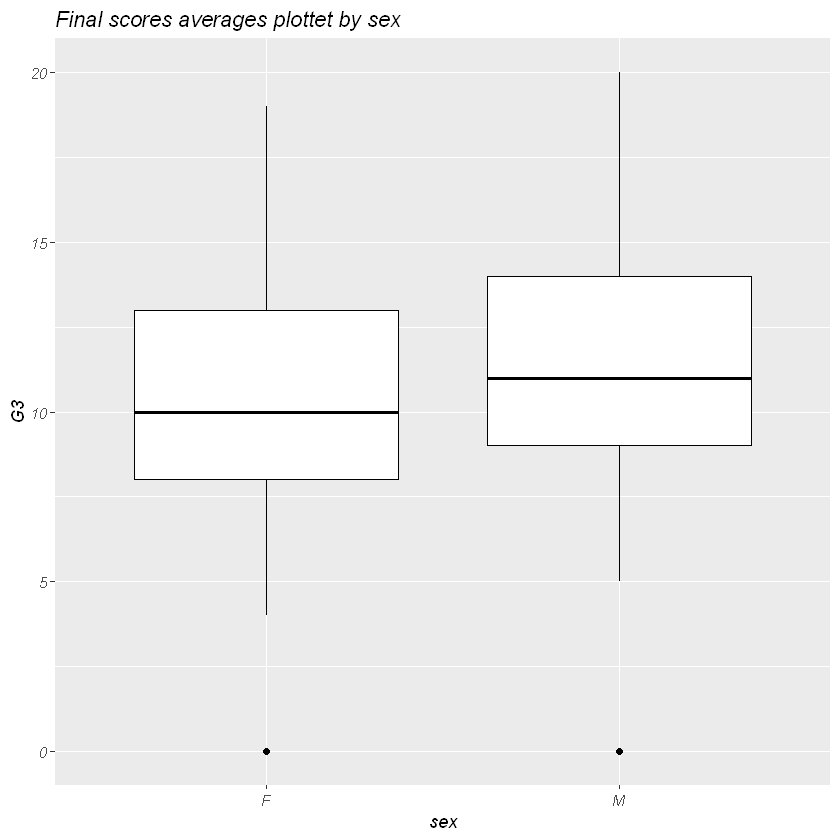

In [33]:
# Box plot visualization of the final scores for each sex

ggplot(math_2,aes(x = sex, y = G3)) + geom_boxplot(col="black") + ggtitle("Final scores averages plottet by sex")



* Assumption # 6: There needs to be homogeneity of variances

* Based on the two tests and the visualization of the data in question, it is safe to say that the assumption of homogeneity of variance is met in this example.

Okay - now for the test, which feels a simple considering all the work we have to do to make sure that the relevant assumptions are met. But that's the way with statistics and data science. The basic syntax for the test is the following:

t.test(x, y)

My code might look a bit confusing, but the only thing ascertained by the square brackets are that the observations in which a pupil scored 0 on the final score is removed.

In [34]:
t.test(math_2$G3[math_2$sex=='F' & math$G3 > 0],math_2$G3[math_2$sex=='M' & math$G3 > 0])


	Welch Two Sample t-test

data:  math_2$G3[math_2$sex == "F" & math$G3 > 0] and math_2$G3[math_2$sex == "M" & math$G3 > 0]
t = -1.9386, df = 351.54, p-value = 0.05335
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.331331307  0.009583978
sample estimates:
mean of x mean of y 
 11.20541  11.86628 


We established,

H0 : No difference in the mean scores of each group

 if p-value is lower we reject the null hypothesis.
 
 The mean score of girls = 11.20
 
 The mean score of boys = 11.86628
 
 The difference = 0.66

Here p-value is 0.053. p-values should be low inorder to be statistically significant.

That means we cannot entirely reject the null hypothesis. But the value is so close to the threshold 0.05, which means it would be better if We do further analysis.

###### Reference:

https://www.kaggle.com/kappernielsen/independent-t-test-example